In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
from pandas import Series, DataFrame
from sklearn import datasets
from patsy import dmatrices


In [2]:
data = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
data

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [4]:
data['Survived'].count()


891

In [5]:
data['Age'].count()

714

Remove the column of ticket and cabin

In [6]:
data = data.drop(['Ticket','Cabin'], axis = 1)
data = data.dropna()

In [7]:
data

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
885          886         0       3   
886          887         0       2   
887          888         1       1   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
885               Rice, Mrs. William (Margaret Norton)  female  39.0      0   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch     Fare Embarked  
0        0   7.2500        S  
1        0  71.2833        C  
2        0   7.9250        S  
3        0  53.1000        S  
4        0   8.0500        S  
..     ...      ...      ...  
885      5  29.1250        Q  
886      0  13.0000        S  
887      0  30.0000        S  
889      0  30.0000        C  
890      0   7.7500        Q  

[712 rows x 10 columns]

In [8]:
fig = plt.figure(figsize=(18,6), dpi= 1600)
alpha = alpha_scatterplot = 0.2
alpha_bar_chart = 0.55

ax1 = plt.subplot2grid((2,3),(0,0))
data.Survived.value_counts().plot(kind='bar', alpha = alpha_bar_chart)
ax1.set_xlim(-1, 2)
plt.title('Distribuiçao de sobreviventes, (1= sobreviveu)')

plt.subplot2grid((2,3),(0,1))
plt.scatter(data.Survived, data.Age, alpha = alpha_scatterplot)
plt.ylabel('Idade')
plt.grid(which='major', axis='y')  
plt.title('Sobreviventes por idade, (1 = Sobreviveu')

ax3 = plt.subplot2grid((2,3),(0,2))
data.Pclass.value_counts().plot(kind='barh', alpha = alpha_bar_chart)
ax3.set_ylim(-1,len(data.Pclass.value_counts()))
plt.title('Distribuiçao por classe')

plt.subplot2grid((2,3),(1,0), colspan = 2)

data.Age[data.Pclass == 1].plot(kind='kde')
data.Age[data.Pclass == 2].plot(kind='kde')
data.Age[data.Pclass == 3].plot(kind='kde')

plt.xlabel('Idade')
plt.title('Distribuiçao de idade por classe')
plt.legend(('1 classe','2 classe', '3 classe'),loc='best')

ax5= plt.subplot2grid((2,3),(1,2))
data.Embarked.value_counts().plot(kind='bar',alpha=alpha_bar_chart)
ax5.set_xlim(-1, len(data.Embarked.value_counts()))
plt.title('Passageiros por local de embarque')


                 

Text(0.5, 1.0, 'Passageiros por local de embarque')

Text(0.5, 1.0, '(1 = Sobreviveu, 0 = Morto)')

<Figure size 600x400 with 0 Axes>

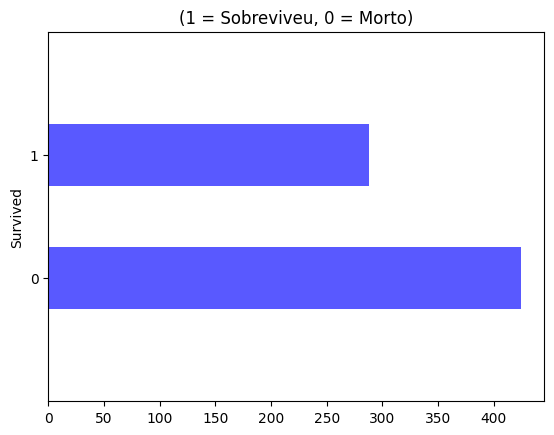

In [9]:

plt.figure(figsize=(6,4))
fig, ax = plt.subplots()
data.Survived.value_counts().plot(kind='barh', color="blue", alpha=.65)
ax.set_ylim(-1, len(data.Survived.value_counts())) 
plt.title("(1 = Sobreviveu, 0 = Morto)")

(-1.0, 2.0)

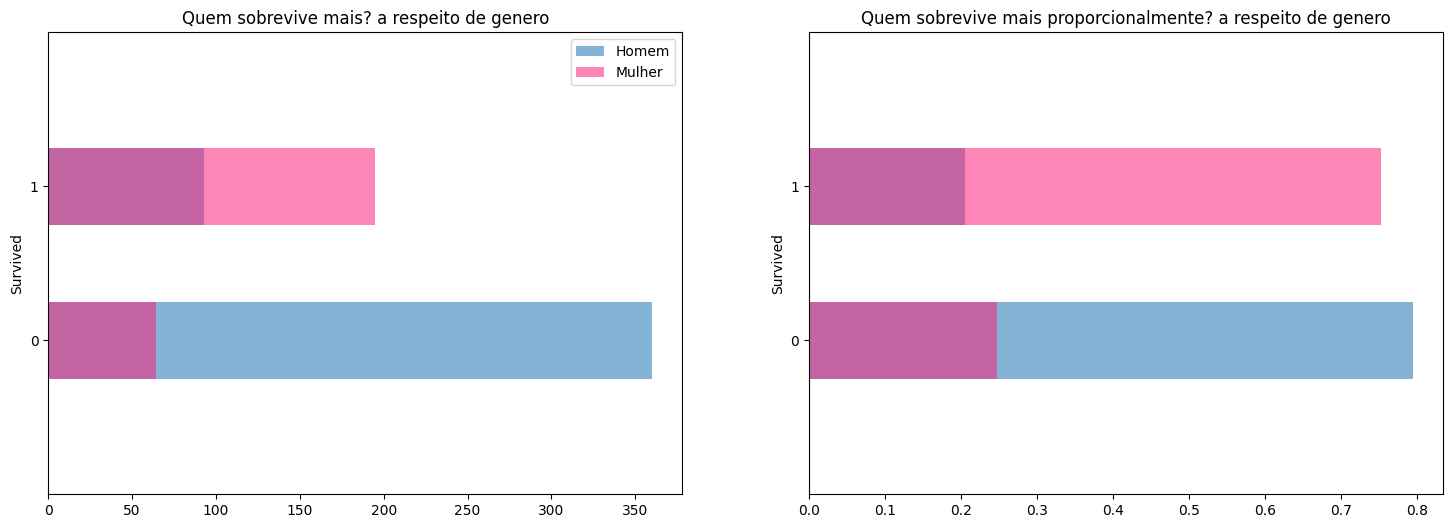

In [10]:
fig = plt.figure(figsize = (18,6))
df_male = data.Survived[data.Sex == 'male'].value_counts().sort_index()
df_female = data.Survived[data.Sex == 'female'].value_counts().sort_index()

ax1 = fig.add_subplot(121)
df_male.plot(kind='barh',label='Homem', alpha = 0.55)
df_female.plot(kind='barh',color= '#FA2379',label='Mulher', alpha = 0.55)
plt.title('Quem sobrevive mais? a respeito de genero'); plt.legend(loc = 'best')
ax1.set_ylim(-1,2)

ax2 = fig.add_subplot(122)
(df_male/float(df_male.sum())).plot(kind='barh', label='homem', alpha=0.55)
(df_female/float(df_female.sum())).plot(kind='barh', color = '#FA2379',label='mulher', alpha=0.55)                             
plt.title('Quem sobrevive mais proporcionalmente? a respeito de genero')


ax2.set_ylim(-1, 2)

In [11]:
fig = plt.figure(figsize=(18,4), dpi=1600)
alpha_level = 0.65

ax1=fig.add_subplot(141)
female_highclass = data.Survived[data.Sex == 'female'][data.Pclass != 3].value_counts()
female_highclass.plot(kind='bar', label='female, highclass', color='#FA2479', alpha=alpha_level)
ax1.set_xticklabels(["Survived", "Died"], rotation=0)
ax1.set_xlim(-1, len(female_highclass))
plt.title("Quem sobrevive? a respeito de classe e genero?"); plt.legend(loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
female_lowclass = data.Survived[data.Sex == 'female'][data.Pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='female, low class', color='pink', alpha=alpha_level)
ax2.set_xticklabels(["Died","Survived"], rotation=0)
ax2.set_xlim(-1, len(female_lowclass))
plt.legend(loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
male_lowclass = data.Survived[data.Sex == 'male'][data.Pclass == 3].value_counts()
male_lowclass.plot(kind='bar', label='male, low class',color='lightblue', alpha=alpha_level)
ax3.set_xticklabels(["Died","Survived"], rotation=0)
ax3.set_xlim(-1, len(male_lowclass))
plt.legend(loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
male_highclass = data.Survived[data.Sex == 'male'][data.Pclass != 3].value_counts()
male_highclass.plot(kind='bar', label='male, highclass', alpha=alpha_level, color='steelblue')
ax4.set_xticklabels(["Died","Survived"], rotation=0)
ax4.set_xlim(-1, len(male_highclass))
plt.legend(loc='best')



With all of this graphs we can understand better how Variables has or hasn`t correlation, we can see that our data off survived people are predominant for the female passagers, and better for the high class passagers

Variables to be used in formulas.

In [17]:
formula_ml = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp + Parch + C(Embarked)'
print(formula_ml)
results = {}

Survived ~ C(Pclass) + C(Sex) + Age + SibSp + Parch + C(Embarked)


In [25]:
y , x = dmatrices (formula_ml, data = data, return_type = 'dataframe')

model = sm.Logit(y,x)

res = model.fit()
results['Logit'] = [res, formula_ml]
res.summary()

Optimization terminated successfully.
         Current function value: 0.444291
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      703
Method:                           MLE   Df Model:                            8
Date:                Mon, 24 Feb 2025   Pseudo R-squ.:                  0.3416
Time:                        09:54:26   Log-Likelihood:                -316.34
converged:                       True   LL-Null:                       -480.45
Covariance Type:            nonrobust   LLR p-value:                 3.985e-66
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.5703      0.480      9.516      0.000       3.629       5.512
C(Pclass)[T.2]      -1.2684      0.298     -4.250      0.000      -1.853      -0.683
C(Pclass)[T.3]      -2.4938      0.296     -8.419      0.000      -3.074      -1.913
C(Sex)[T.male]      -2.6411      0.223    -11.854      0.000      -3.078      -2.204
C(Embarked)[T.Q]    -0.8445      0.599     -1.410      0.159      -2.019       0.330
C(Embarked)[T.S]    -0.4277      0.271     -1.579      0.114      -0.958       0.103
Age                 -0.0437      0.008     -5.272      0.000      -0.060      -0.027
SibSp               -0.3558      0.129     -2.768      0.006      -0.608      -0.104
Parch               -0.0446      0.121     -0.370      0.712      -0.281       0.192
====================================================================================
"""

Text(0.5, 1.0, 'Logit predicts = blue, Fitted predict = red')

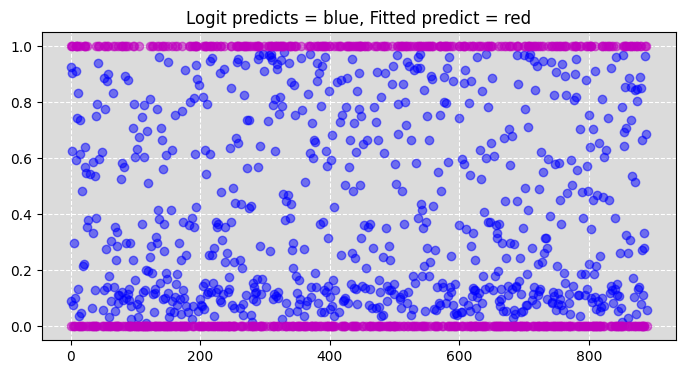

In [31]:
plt.figure(figsize=(18,4))
plt.subplot(121, facecolor='#DBDBDB')
ypred = res.predict(x)
plt.plot(x.index,ypred, 'bo', x.index, y, 'mo', alpha=0.5);
plt.grid(color='white', linestyle='dashed')
plt.title('Logit predicts = blue, Fitted predict = red')



In [13]:
import sklearn.ensemble as ske

In [14]:
y, x = dmatrices(formula_ml, data=data, return_type='dataframe')
y = np.asarray(y).ravel()
results_rf = ske.RandomForestClassifier(n_estimators=100).fit(x,y)
score = results_rf.score(x, y)
print(score)

0.9452247191011236


In [15]:
from sklearn.model_selection import cross_val_score

In [16]:
cv = cross_val_score(results_rf, x, y, cv=10)
print(cv)

[0.63888889 0.76388889 0.76056338 0.81690141 0.81690141 0.78873239
 0.83098592 0.76056338 0.83098592 0.85915493]
